<a href="https://colab.research.google.com/github/aswa09/EVA-4/blob/master/S13%20-%20YOLO%202%20%26%203/EVA4_S13_yolo_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

##Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
os.chdir('./drive/My Drive/Colab Notebooks/S13/coco/')

!ls

benji.jpg   room_ser.jpg	       yolov3.cfg
coco.names  yolo_object_detection.zip  yolov3.weights


## Load Yolo

In [4]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Loading image

In [5]:
img = cv2.imread("benji.jpg")
print(img.shape)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
print(img.shape)
height, width, channels = img.shape

(4032, 3024, 3)
(1613, 1210, 3)


## Detecting objects

In [6]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

In [7]:
net.setInput(blob)
outs = net.forward(output_layers)

## Showing informations on the screen

In [8]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)



[[1]
 [2]
 [0]]


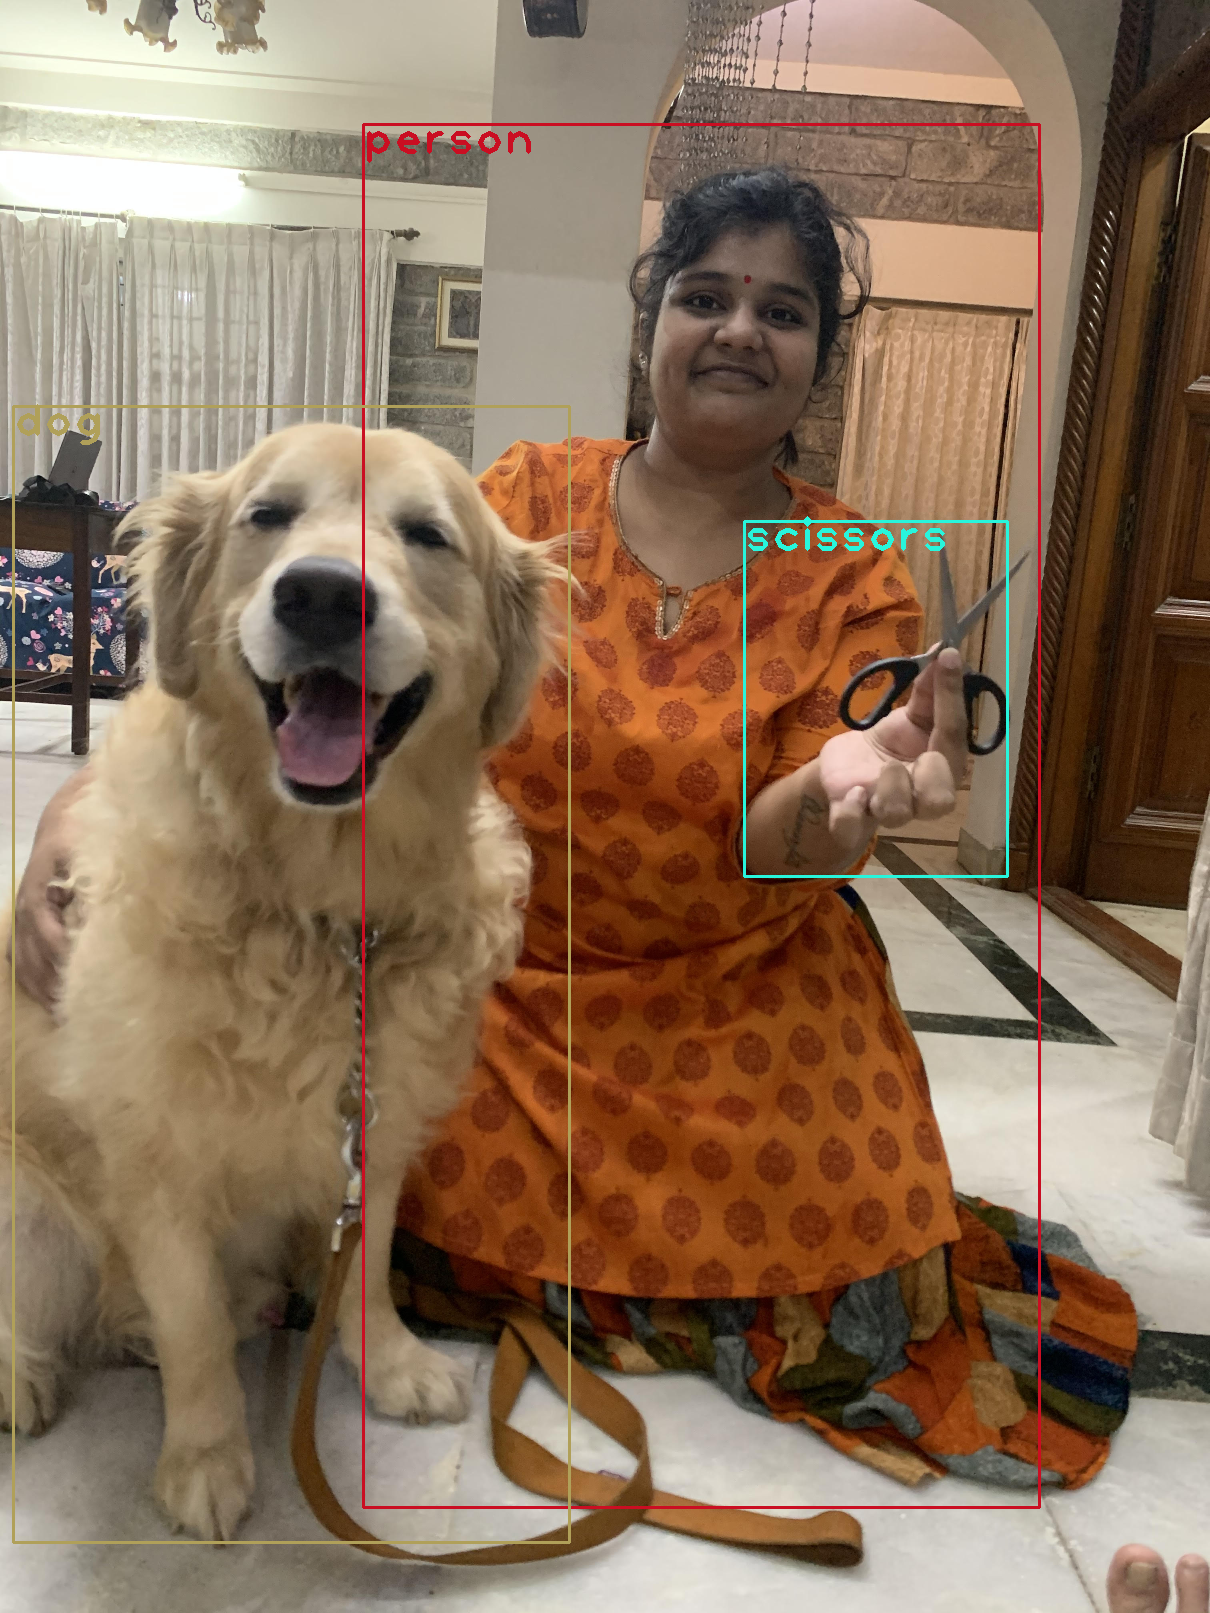

In [9]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows() 